In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Mastodon Revenue Model

First make sure, we are in the Project's main directory: 'ECE143Project'

In [2]:
pwd

'/Users/luke/ece143/ECE143Project'

In [3]:
cd ./Analysis/Mastodon

/Users/luke/ece143/ECE143Project/Analysis/Mastodon


In [4]:
import dcfunding

In [5]:
cd ../..

/Users/luke/ece143/ECE143Project


In [6]:
monthly_donations = 6380
total_patrons = 752

patrons = pd.read_csv('Datasets/Mastodon/mastodon_patreon.csv')

patrons = dcfunding.calc_donations(patrons,total_patrons)
patrons.head()

total donations per month (lower bound): 6341


,Donation level,min_donation,benefits,count,total_donations
0,Every dollar counts,1,Access to development Discord,601,601
1,Sponsors,10,"Your name on the sponsors list, as well as pre...",88,880
2,Highlighted sponsors,20,Listed at the top of the general sponsors list...,15,300
3,Silver sponsors,40,Your name and link along with a small avatar o...,24,960
4,Gold sponsors,100,Your medium-sized logo as a link at the very t...,12,1200


The patrons data is best illustrated in a pie chart.

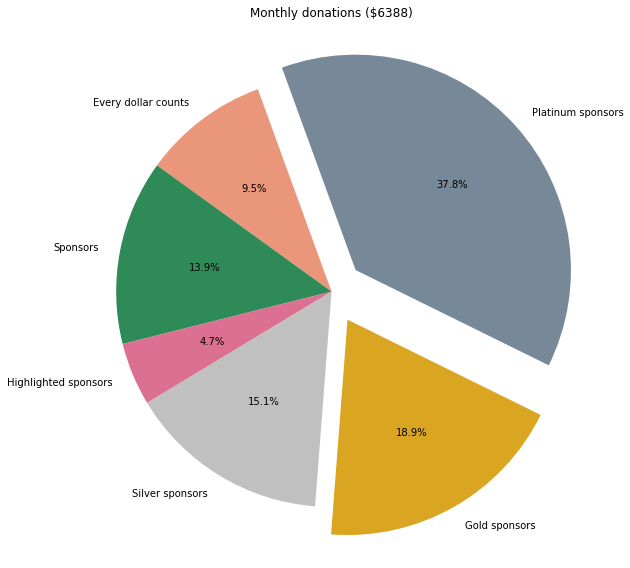

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ratios = list(patrons['total_donations'])
labels = list(patrons['Donation level'])
explode = [0, 0, 0, 0, 0.15, 0.15] # isolate platinum and gold sponsors
colors = ['darksalmon','seagreen','palevioletred','silver','goldenrod','lightslategrey']
angle = 110  # rotate so that platinum and gold are split by the x-axis

ax.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode,colors=colors)
ax.set_title('Monthly donations ($6388)')
ax.figure.savefig('Figures/mastodon_sponsors.png', transparent=True)
plt.tight_layout()
plt.show()

Furthermore, we can look into company donations through the platinum and gold sponsors:

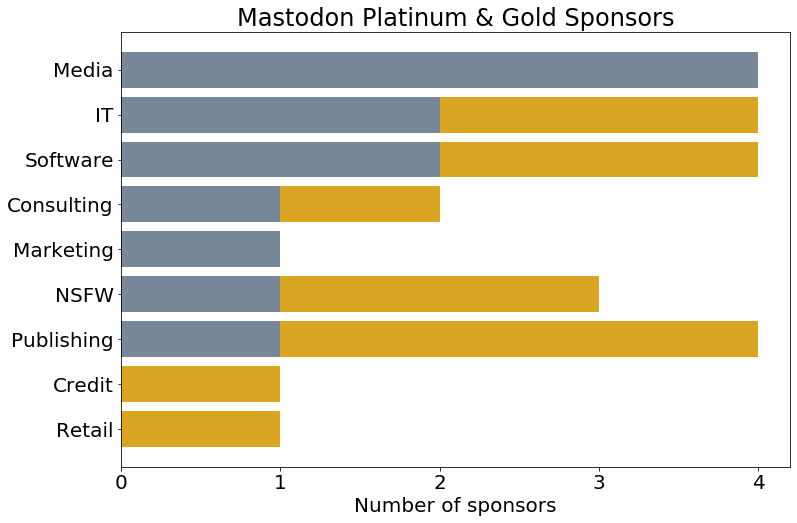

In [8]:
co_sponsors = pd.read_csv('Datasets/Mastodon/mastodon_gold_sponsors.csv')
ind_co_sponsors = dcfunding.ind_platgold(co_sponsors,plotName='Figures/mastodon_pg_sponsors.jpg')